Are there variables that are particularly significant in terms of explaining the answer to your project question?
Are there significant differences between subgroups in your data that may be relevant to your project aim?
Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
What are the most appropriate tests to use to analyze these relationships?

ex. what's driving prices? statistical questions from the proposal. differences between groups, like december top compared to other months. t-test. distribution of prices - confidence interval of mean/median price bootstrap. correlations with price

form some hypothesis & in write up

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
seattle = pd.read_csv("/Users/karinahou/Desktop/Data Science Bootcamp/Seattle DF Cleaned.csv")
calendar = pd.read_csv("/Users/karinahou/Desktop/Data Science Bootcamp/Calendar Cleaned.csv")

In [3]:
seattle.head()

,Unnamed: 0,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,price,...,location,name,currency,rate_type,id,neighbourhood_group,neighbourhood,minimum_nights,last_review,availability_365
0,0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,250,...,0101000020E6100000D449B6BA9C925EC0416326512FCE...,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly,2318,Central Area,Madrona,4,2019-06-18,335
1,1,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0.0,49,...,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"Cozy Studio, min. to downtown -WiFi",USD,nightly,5682,Delridge,South Delridge,3,2018-11-24,0
2,2,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,90,...,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"Fab, private seattle urban cottage!",USD,nightly,6606,Other neighborhoods,Wallingford,2,2019-06-23,43
3,3,9419,30559,Private room,"Seattle, WA, United States",130,4.5,2,1.0,65,...,0101000020E6100000145D177E70945EC0522B4CDF6BC6...,Glorious sun room w/ memory foambed,USD,nightly,9419,Other neighborhoods,Georgetown,2,2019-06-23,356
4,4,9460,30832,Private room,"Seattle, WA, United States",401,5.0,2,1.0,78,...,0101000020E6100000DD7A4D0F0A955EC00BD28C45D3CD...,Downtown/Convention Ctr B&B - Nice!,USD,nightly,9460,Downtown,First Hill,3,2019-07-07,87


In [4]:
seattle.dtypes

Unnamed: 0                int64
room_id                   int64
host_id                   int64
room_type                object
address                  object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                     int64
last_modified            object
latitude                float64
longitude               float64
location                 object
name                     object
currency                 object
rate_type                object
id                        int64
neighbourhood_group      object
neighbourhood            object
minimum_nights            int64
last_review              object
availability_365          int64
dtype: object

In [5]:
calendar.head()

,Unnamed: 0,listing_id,date,available,price,month
0,0,241032,2016-01-04,t,$85.00,January
1,1,241032,2016-01-05,t,$85.00,January
2,2,241032,2016-01-06,f,$0,January
3,3,241032,2016-01-07,f,$0,January
4,4,241032,2016-01-08,f,$0,January


In [6]:
#changing the price column into a float for later calculations
calendar.price = calendar.price.str.replace('$', '').str.replace(',', '')
calendar.price = pd.to_numeric(calendar.price)

what kind of t test to use? t test to compare december and the other months combined? what to compare? like the average prices december v. all? what would that tell you? would you use a t-test? is that the only thing i should do?

would show december is a particular month

distribution of prices - see how represnetative prices are. bootstrap technique and confidence intervals, correlations with other variables?

In [7]:
december = calendar.loc[calendar.month == "December"]
december.head()

,Unnamed: 0,listing_id,date,available,price,month
332,332,241032,2016-12-01,t,85.0,December
333,333,241032,2016-12-02,t,85.0,December
334,334,241032,2016-12-03,t,85.0,December
335,335,241032,2016-12-04,t,85.0,December
336,336,241032,2016-12-05,t,85.0,December


In [8]:
#np.mean(december.price) #how to calulate series to float?

In [9]:
december.dtypes

Unnamed: 0      int64
listing_id      int64
date           object
available      object
price         float64
month          object
dtype: object

In [10]:
print("December + booked days mean:", np.mean(december.price)) #the price including the days that they were book == 0
print("December + booked days standard dev.:", np.std(december.price))

print("December - booked days mean:", np.mean(np.nonzero(december.price))) 
print("December - booked days standard dev:", np.std(np.nonzero(december.price)))

print("December pricing median", np.median(december.price))
#the price excluding the days that they were already booked (not including 0 values)

#look at how to take out outliers? summary statistics? describe? histogram of prices just to see if there are any weird values

December + booked days mean: 100.95880295375049
December + booked days standard dev.: 108.57907570335787
December - booked days mean: 59098.36784553359
December - booked days standard dev: 34486.678062120416
December pricing median 85.0


/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [11]:
#making a def so can print out the same thing for other months
def booked_means_std(month):
    print("Booked days mean:", np.mean(month.price))
    print("Booked days standard dev", np.std(month.price))
    print("Mean of non zeros values only:", np.mean(np.nonzero(month.price)))
    print("Std of non zero values only:", np.std(np.nonzero(month.price)))
    print("Pricing median", np.median(month.price))

booked_means_std(december)

Booked days mean: 100.95880295375049
Booked days standard dev 108.57907570335787
Mean of non zeros values only: 59098.36784553359
Std of non zero values only: 34486.678062120416
Pricing median 85.0


In [12]:
nondec = calendar.loc[calendar.month != "December"]

In [13]:
booked_means_std(nondec)

Booked days mean: 91.72277393876469
Booked days standard dev 107.61659654100761
Mean of non zeros values only: 637978.3750727155
Std of non zero values only: 368411.74102537514
Pricing median 75.0


In [14]:
#can do a loop through each month and a loop through each neighborhood

In [15]:
months = ["January", "February", "March", "April", "May", "June",
         "July", "August", "September","October", "November", "December"]


for i in months:
    print(i)
    single_month = calendar.loc[calendar.month == i]
    print(booked_means_std(single_month))

January
Booked days mean: 69.6834992142483
Booked days standard dev 90.39025309263543
Mean of non zeros values only: 57568.32961177757
Std of non zero values only: 32944.56357780701
Pricing median 55.0
None
February
Booked days mean: 82.30843915391702
Booked days standard dev 94.89955594900215
Mean of non zeros values only: 55352.21249028246
Std of non zero values only: 31668.574837441476
Pricing median 70.0
None
March
Booked days mean: 91.2330471957958
Booked days standard dev 98.6361039317581
Mean of non zeros values only: 59145.307095713506
Std of non zero values only: 33834.04982157087
Pricing median 79.0
None
April
Booked days mean: 89.68370001746115
Booked days standard dev 102.36487487185917
Mean of non zeros values only: 57119.475334376686
Std of non zero values only: 32807.41015430628
Pricing median 75.0
None
May
Booked days mean: 94.2818229439497
Booked days standard dev 106.84536971516003
Mean of non zeros values only: 59166.9857823461
Std of non zero values only: 34055.5298

maybe I should be looking into bedrooms, location, and price?
look through the top booked 10 neighborhoods from the data visualization and see the price averages for each of those neighborhoods. are there any factors that affect the price? what about the ratings of these neighborhoods specifically?

The top neighborhooods were: Broadway, Belltown, First Hill, Wallingford, Minor, Central Business District, Fremont, Stevens, University District, North Beacon Hill

In [16]:
def neighborhood_satisfaction(neighborhood):
    print("Mean of Neighborhood Reviews: ", np.mean(neighborhood.overall_satisfaction))
    print("Median of Neighborhood Reviews: ", np.median(neighborhood.overall_satisfaction) )

In [17]:
top_10_neighborhoods = ["Broadway", "Belltown", "First Hill", "Wallingford", 
                       "Minor", "Central Business District", "Fremont", "Stevens",
                       "University District", "North Beacon Hill"]

for j in top_10_neighborhoods:
    print(j)
    specific_neighborhood = seattle.loc[seattle.neighbourhood == j]
    print(booked_means_std(specific_neighborhood), neighborhood_satisfaction(specific_neighborhood))

Broadway
Booked days mean: 98.33149171270718
Booked days standard dev 72.60002094642402
Mean of non zeros values only: 180.5
Std of non zero values only: 104.5
Pricing median 80.0
Mean of Neighborhood Reviews:  4.236187845303867
Median of Neighborhood Reviews:  5.0
None None
Belltown
Booked days mean: 108.99702380952381
Booked days standard dev 61.111748661575916
Mean of non zeros values only: 167.5
Std of non zero values only: 96.99441564681271
Pricing median 90.0
Mean of Neighborhood Reviews:  3.7901785714285716
Median of Neighborhood Reviews:  4.5
None None
First Hill
Booked days mean: 100.42105263157895
Booked days standard dev 40.28514478216548
Mean of non zeros values only: 113.5
Std of non zero values only: 65.81729762506713
Pricing median 80.5
Mean of Neighborhood Reviews:  3.43859649122807
Median of Neighborhood Reviews:  4.5
None None
Wallingford
Booked days mean: 114.21860465116279
Booked days standard dev 86.98667969617313
Mean of non zeros values only: 107.0
Std of non zer

Noticing a trend that the more popular neighborhoods have the higher mean of non-zero values. Correlation between neighborhood & price?

the most popular neighborhood doesn't have the highest ratings of satisfaction afterwards

What could I do with that though? Can I predict future prices with this?

In [18]:
#price of december vs other months. z test or t test :b
#do mini project kind of stuff

In [19]:
#trying some bootstrappping
np.random.seed(47)
N_rep = 10000

In [20]:
december_data = calendar.loc[calendar.month == "December"].price

replicates = []
for replicate in range(10000):
    replicate = np.random.choice(december_data, len(december_data))
    replicate_mean = np.mean(replicate)
    replicates.append(replicate_mean)
    
dec_price_mean = np.mean(replicates)
np.percentile(replicates, 5)

100.4473998377803

In [21]:
dec_price_std = np.std(replicates, ddof = 1)
dec_price_std

0.31197111651635107

In [22]:
x0 = calendar.loc[calendar.month == "December"].price
x1 = calendar.loc[calendar.month != "December"].price

In [23]:
# bootstrap replicate function
def bs_replicate_1d(data, func, **kwargs):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample, **kwargs)

In [24]:
def std_diff(x0, x1):
    s0 = bs_replicate_1d(x0, np.std)
    s1 = bs_replicate_1d(x1, np.std)
    return s0 - s1

In [25]:
seed(47)
std_diffs = [std_diff(x1, x0) for i in np.arange(1000)]

In [26]:
sd_diff_pc = np.percentile(std_diffs, [2.5, 97.5])
sd_diff_pc

array([-2.46412412,  0.4812325 ])

In [79]:
rep_x0 = []
for recplicate in range(10000):
    replicate = np.random.choice(x0, len(december_data))
    replicate_std = np.std(replicate)
    rep_x0.append(replicate_std)

rep_x1 = []
for recplicate in range(10000):
    replicate = np.random.choice(x1, len(december_data))
    replicate_std = np.std(replicate)
    rep_x1.append(replicate_std)
    
std_subs = np.subtract(rep_x1, rep_x0)
percentiles = np.percentile(std_subs, [2.5, 97.5])
percentiles

array([-2.88007965,  0.91149158])

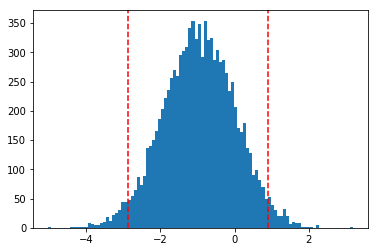

In [80]:
plt.hist(std_subs, bins = 100)
_ = plt.axvline(percentiles[0], color='r', linestyle = "--")
_ = plt.axvline(percentiles[1], color='r', linestyle = "--")

Looking at the chart, the differences of the standard deviations of the month of december vs the other months include the zero value. This means that we cannot reject the null hypothesis and that the two data sets have no significant difference. Could be that the std devs are too similar.

In [81]:
rep_x0_mean = []
for recplicate in range(10000):
    replicate = np.random.choice(x0, len(december_data))
    replicate_mean = np.mean(replicate)
    rep_x0_mean.append(replicate_mean)

rep_x1_mean = []
for recplicate in range(10000):
    replicate = np.random.choice(x1, len(december_data))
    replicate_mean = np.mean(replicate)
    rep_x1_mean.append(replicate_mean)
    
mean_subs = np.subtract(rep_x1_mean, rep_x0_mean)
mean_percentiles = np.percentile(mean_subs, [2.5, 97.5])
mean_percentiles

array([-10.10011976,  -8.34380714])

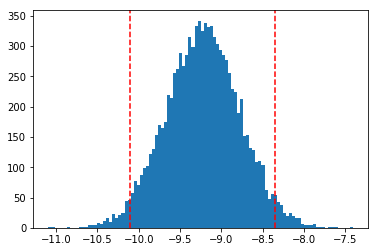

In [82]:
plt.hist(mean_subs, bins = 100)
_ = plt.axvline(mean_percentiles[0], color='r', linestyle = "--")
_ = plt.axvline(mean_percentiles[1], color='r', linestyle = "--")

This bootstrap graph compares the means instead of the standard deviations. This chart does not include the 0 value on the x axis which indicates that there is a significant difference between the prices of December and the other months. 

In [30]:
#do some t-tests or z test (frequentist test mini project). scipy stats t test

In [31]:
from scipy.stats import ttest_ind

ttest_ind(x0, x1, equal_var=False)

Ttest_indResult(statistic=28.01488349016628, pvalue=3.1908654839115994e-172)

The t statistic value is very high which means we cannot reject the null hypothesis like the above chart shows.
P value is low so it means we CAN reject the null hypothesis
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [32]:
#correlations with price(min number of nights/availability/#reviews/#bedrooms)
# corr function https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
# try both pearson and spearman correlation

In [33]:
seattle_corr_pear = seattle.corr(method = 'pearson')
seattle_corr_pear

,Unnamed: 0,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,id,minimum_nights,availability_365
Unnamed: 0,1.000000,0.987974,0.443769,-0.528840,-0.338924,0.060741,0.006106,-0.046357,-0.076605,-0.000304,0.987974,0.000369,-0.186202
room_id,0.987974,1.000000,0.445554,-0.532479,-0.320969,0.061523,0.005121,-0.041829,-0.078023,-0.001528,1.000000,-0.004136,-0.191572
host_id,0.443769,0.445554,1.000000,-0.201679,-0.046224,0.044256,0.021115,-0.013522,-0.020991,-0.003675,0.445554,-0.016808,-0.053999
reviews,-0.528840,-0.532479,-0.201679,1.000000,0.333880,-0.100785,-0.155705,-0.181143,-0.005944,-0.002562,-0.532479,-0.090833,0.020116
overall_satisfaction,-0.338924,-0.320969,-0.046224,0.333880,1.000000,-0.017579,-0.040585,-0.083290,0.030058,0.006316,-0.320969,-0.118417,-0.057503
accommodates,0.060741,0.061523,0.044256,-0.100785,-0.017579,1.000000,0.810704,0.557956,-0.005499,-0.029531,0.061523,-0.041187,0.023185
bedrooms,0.006106,0.005121,0.021115,-0.155705,-0.040585,0.810704,1.000000,0.595235,0.012602,-0.027214,0.005121,-0.006057,0.013548
price,-0.046357,-0.041829,-0.013522,-0.181143,-0.083290,0.557956,0.595235,1.000000,0.027909,-0.088638,-0.041829,0.013503,0.080062
latitude,-0.076605,-0.078023,-0.020991,-0.005944,0.030058,-0.005499,0.012602,0.027909,1.000000,-0.143571,-0.078023,0.017817,0.021408
longitude,-0.000304,-0.001528,-0.003675,-0.002562,0.006316,-0.029531,-0.027214,-0.088638,-0.143571,1.000000,-0.001528,0.017125,0.013636


In [34]:
seattle_corr_spea = seattle.corr(method = 'spearman')
seattle_corr_spea

,Unnamed: 0,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,id,minimum_nights,availability_365
Unnamed: 0,1.000000,1.000000,0.421298,-0.581456,-0.246750,0.046375,-0.009267,-0.049188,-0.078539,-0.000701,1.000000,-0.138715,-0.177738
room_id,1.000000,1.000000,0.421298,-0.581456,-0.246750,0.046375,-0.009267,-0.049188,-0.078539,-0.000701,1.000000,-0.138715,-0.177738
host_id,0.421298,0.421298,1.000000,-0.141231,-0.006295,0.020979,-0.003603,-0.018677,-0.004446,-0.007321,0.421298,-0.164107,-0.068785
reviews,-0.581456,-0.581456,-0.141231,1.000000,0.516345,-0.062653,-0.145889,-0.213248,0.027658,0.019350,-0.581456,-0.179553,-0.007168
overall_satisfaction,-0.246750,-0.246750,-0.006295,0.516345,1.000000,0.003385,-0.005037,-0.005514,0.042151,-0.018762,-0.246750,0.000900,-0.087343
accommodates,0.046375,0.046375,0.020979,-0.062653,0.003385,1.000000,0.704977,0.577636,-0.022322,-0.065725,0.046375,0.045086,0.013992
bedrooms,-0.009267,-0.009267,-0.003603,-0.145889,-0.005037,0.704977,1.000000,0.546000,0.026367,-0.034782,-0.009267,0.130744,0.001302
price,-0.049188,-0.049188,-0.018677,-0.213248,-0.005514,0.577636,0.546000,1.000000,0.029342,-0.108257,-0.049188,0.239434,0.074571
latitude,-0.078539,-0.078539,-0.004446,0.027658,0.042151,-0.022322,0.026367,0.029342,1.000000,-0.182024,-0.078539,0.032785,0.009128
longitude,-0.000701,-0.000701,-0.007321,0.019350,-0.018762,-0.065725,-0.034782,-0.108257,-0.182024,1.000000,-0.000701,0.006734,0.006055


pd.scatter_matrix
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html

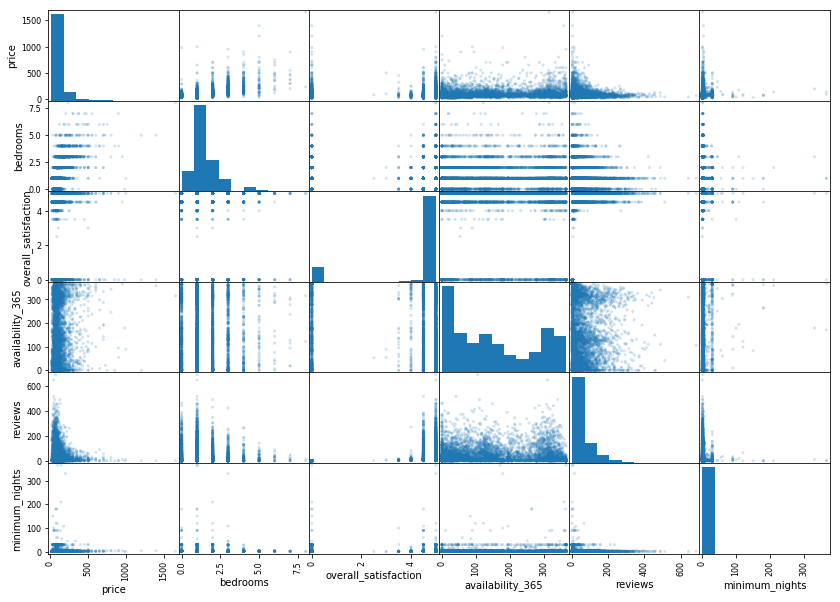

In [78]:
#df = pd.DataFrame(np.random.randn(1000, 4), columns=['price','bedrooms','overall_satisfaction','availability'])
pd.plotting.scatter_matrix(seattle[['price','bedrooms','overall_satisfaction','availability_365', 'reviews', 'minimum_nights']], alpha=0.2, figsize = (14,10));
